In [127]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sn

In [128]:
X = pd.read_csv("CLEAN_FULL_IRS990.csv")
X = X.drop(columns= ["USA_zip_code","ein","year","net_UBI_taxable_income","total_gross_UBI","ActvtyOrMssnDsc","USA_state"])

In [129]:
X

,prior_year_invest_income,curr_year_invest_income,crr_year_other_revenue,prior_year_other_revenue,prior_year_total_revenue,curr_year_total_revenue,curr_year_grants_amount,prior_year_grants_amount,curr_year_members_benef_payment,prior_year_members_benef_payment,...,total_liabi_EOY,total_liabi_BOY,net_assets_BOY,net_assets_EOY,num_employees,num_volunteers,curr_year_contrib_grants,prior_year_contrib_grants,curr_year_program_serv_revenue,prior_year_program_serv_revenue
0,4985,875,46056,2446,10860792,8149792,0,1895000,0,0,...,1798050,2958635,7086852,7101715,41,8,6063806,9630722,2039055,1222639
1,44884,49828,879096,867183,24058668,27603661,4399851,4046270,0,0,...,1312351,1588733,34879994,41980445,223,0,12297805,8879443,14376932,14267158
2,150,968,0,904,5321891,5435578,53750,58500,0,0,...,750083,217444,138519,498614,263,10,5406990,5244175,27620,76662
3,3694,2779,0,0,120597,120137,0,0,0,0,...,8150,12635,814511,853564,0,0,0,0,117358,116903
4,4695186,12813959,199083,264748,73185269,83728369,17832579,16936028,0,0,...,68839021,68886096,179666114,175434547,1608,0,8385105,8503360,62330222,59721975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863,30569,41084,19793,20411,121273,455490,59888,41182,0,0,...,0,0,931995,1301531,0,0,394613,70293,0,0
1864,13538818,15218611,3715694,3588698,286482823,280741520,49293154,45146310,0,0,...,259683638,268196673,511527113,557624127,2379,3149,37575035,46246422,224232180,223108885
1865,0,0,0,0,4606433,6266634,0,0,0,0,...,0,0,0,0,186,11,0,4606433,6266634,0
1866,2098728,1381647,42824,350249,69733113,58854183,27181312,24898597,0,0,...,19435024,19131838,99035262,100339317,513,200,2848358,16890026,54581354,50394110


In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.3,
    random_state = 0

)

X_train.shape, X_test.shape

((1307, 32), (561, 32))

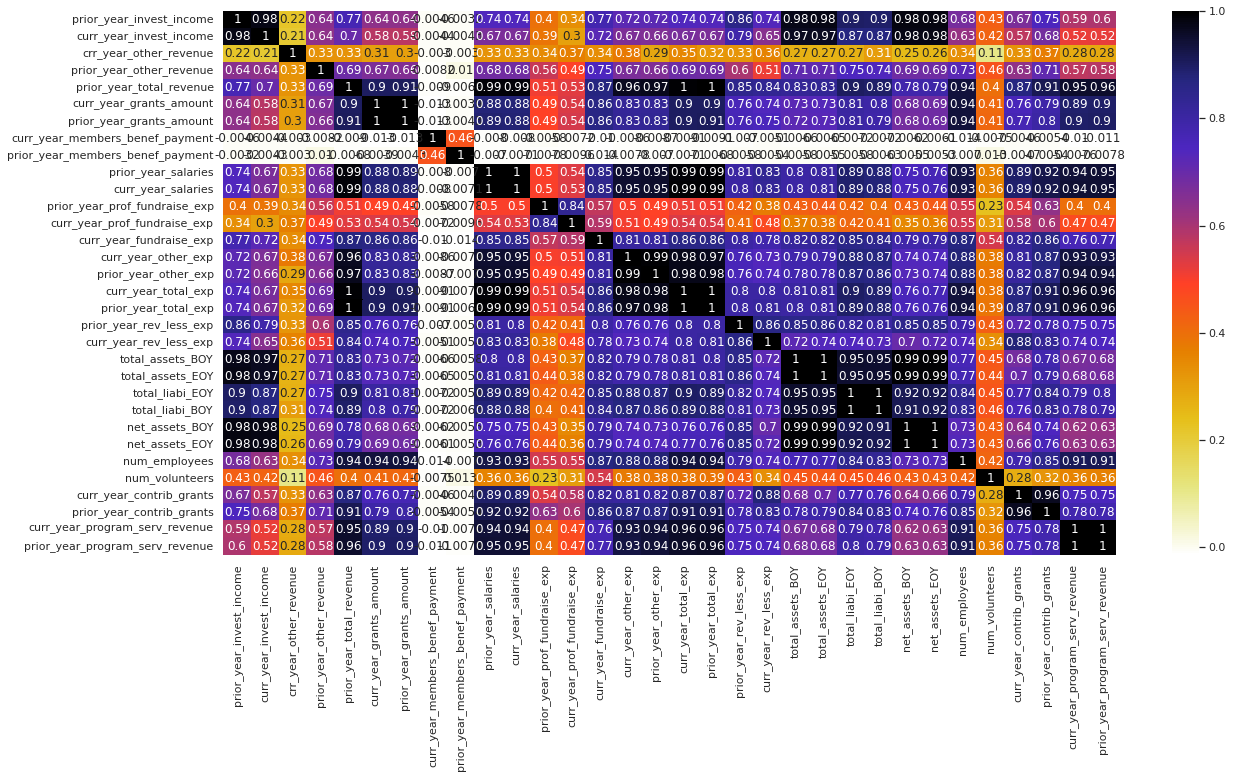

In [132]:
import seaborn as sns

plt.figure(figsize = (20,10))
cor = X_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [133]:
def correlate(dataset,threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range (len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold :
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [134]:
corr_features = correlate(X_train,0.93)
len(set(corr_features))

18

In [135]:
X_train.drop(corr_features,axis = 1 )
X_test.drop(corr_features,axis = 1 )

X_train = X_train.drop(corr_features,axis = 1 )

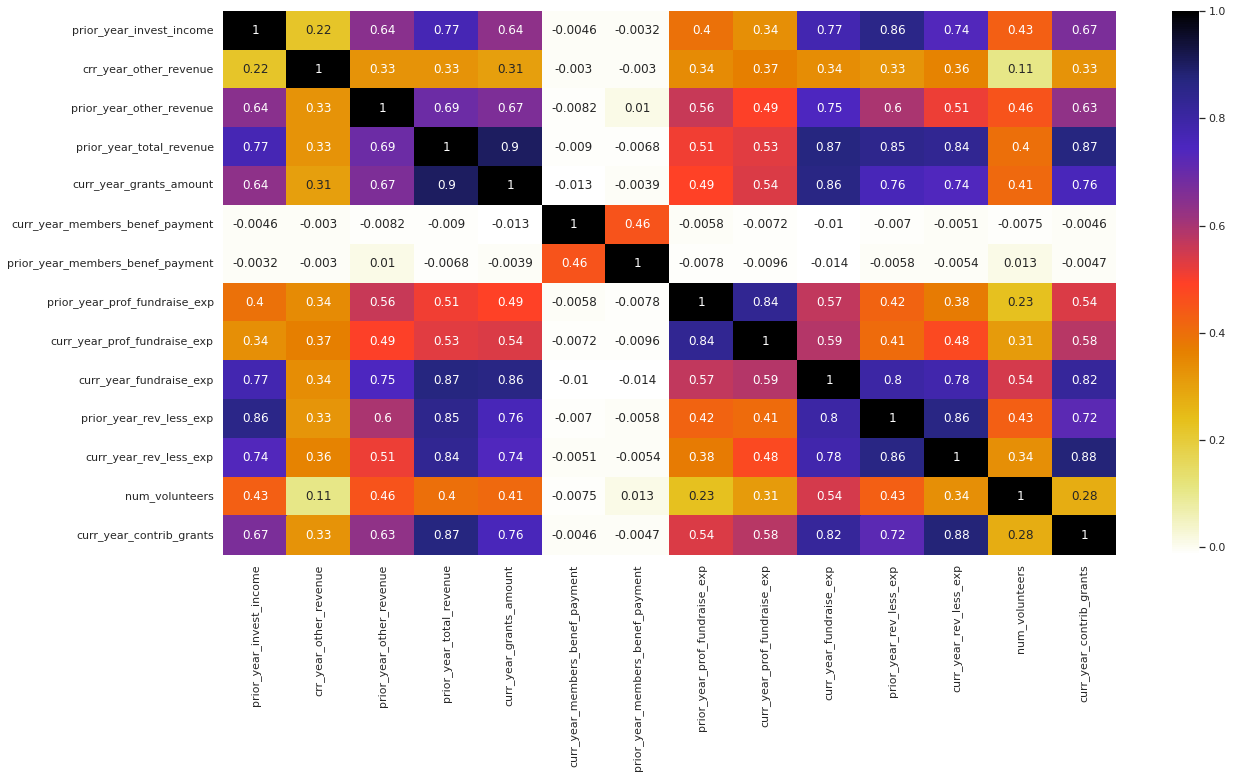

In [136]:
import seaborn as sns
# X = X.drop(corr_features,axis = 1 )
plt.figure(figsize = (20,10))
cor2 = X_train.corr()
sns.heatmap(cor2,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [137]:
x_norm = (X - X.min())/(X.max()-X.min())
x_norm

,prior_year_invest_income,curr_year_invest_income,crr_year_other_revenue,prior_year_other_revenue,prior_year_total_revenue,curr_year_total_revenue,curr_year_grants_amount,prior_year_grants_amount,curr_year_members_benef_payment,prior_year_members_benef_payment,...,total_liabi_EOY,total_liabi_BOY,net_assets_BOY,net_assets_EOY,num_employees,num_volunteers,curr_year_contrib_grants,prior_year_contrib_grants,curr_year_program_serv_revenue,prior_year_program_serv_revenue
0,1.991632e-06,2.918472e-07,0.000061,0.000007,0.001502,0.000961,0.000000,0.002312,0.0,0.0,...,6.942006e-05,8.447344e-05,0.000188,0.000168,0.000833,0.000348,0.001739,0.004291,0.000374,0.000244
1,1.793228e-05,1.661961e-05,0.001157,0.002647,0.003328,0.003256,0.005400,0.004936,0.0,0.0,...,5.066794e-05,4.536069e-05,0.000924,0.000995,0.004531,0.000000,0.003526,0.003956,0.002634,0.002847
2,5.992875e-08,3.228664e-07,0.000000,0.000003,0.000736,0.000641,0.000066,0.000071,0.0,0.0,...,2.895960e-05,6.208350e-06,0.000004,0.000012,0.005343,0.000435,0.001550,0.002336,0.000005,0.000015
3,1.475845e-06,9.269067e-07,0.000000,0.000000,0.000017,0.000014,0.000000,0.000000,0.0,0.0,...,3.146595e-07,3.607481e-07,0.000022,0.000020,0.000000,0.000000,0.000000,0.000000,0.000022,0.000023
4,1.875844e-03,4.273963e-03,0.000262,0.000808,0.010124,0.009877,0.021887,0.020661,0.0,0.0,...,2.657773e-03,1.966801e-03,0.004761,0.004156,0.032670,0.000000,0.002404,0.003788,0.011419,0.011919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863,1.221308e-05,1.370314e-05,0.000026,0.000062,0.000017,0.000054,0.000074,0.000050,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000025,0.000031,0.000000,0.000000,0.000113,0.000031,0.000000,0.000000
1864,5.409096e-03,5.076010e-03,0.004891,0.010954,0.039630,0.033117,0.060501,0.055075,0.0,0.0,...,1.002600e-02,7.657415e-03,0.013554,0.013210,0.048335,0.136913,0.010774,0.020603,0.041081,0.044526
1865,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000637,0.000739,0.000000,0.000000,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.003779,0.000478,0.000000,0.002052,0.001148,0.000000
1866,8.384943e-04,4.608340e-04,0.000056,0.001069,0.009646,0.006943,0.033362,0.030374,0.0,0.0,...,7.503576e-04,5.462425e-04,0.002624,0.002377,0.010423,0.008696,0.000817,0.007525,0.010000,0.010057


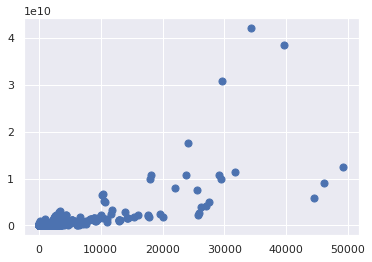

In [138]:
plt.scatter(X["num_employees"],X["net_assets_EOY"], s=50)

In [139]:
X["num_employees"]

0         41
1        223
2        263
3          0
4       1608
        ... 
1863       0
1864    2379
1865     186
1866     513
1867    1175
Name: num_employees, Length: 1868, dtype: int64

In [140]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(x_norm[["num_employees","net_assets_EOY"]])
y_kmeans = kmeans.predict(x_norm[["num_employees","net_assets_EOY"]])

In [141]:
print(y_kmeans[0:4]) 

[0 0 0 0]


In [142]:
print(kmeans.cluster_centers_) 

[[0.02293813 0.00333907]
 [0.72673561 0.44659038]
 [0.28937135 0.06861881]]


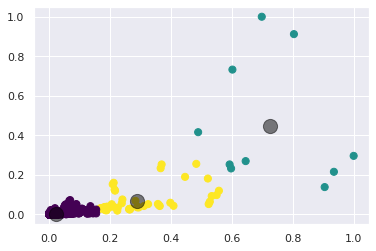

In [143]:
plt.scatter(x_norm["num_employees"],x_norm["net_assets_EOY"], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_ # extract final centroids from each cluster
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [144]:
x_norm.describe()

,prior_year_invest_income,curr_year_invest_income,crr_year_other_revenue,prior_year_other_revenue,prior_year_total_revenue,curr_year_total_revenue,curr_year_grants_amount,prior_year_grants_amount,curr_year_members_benef_payment,prior_year_members_benef_payment,...,total_liabi_EOY,total_liabi_BOY,net_assets_BOY,net_assets_EOY,num_employees,num_volunteers,curr_year_contrib_grants,prior_year_contrib_grants,curr_year_program_serv_revenue,prior_year_program_serv_revenue
count,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,...,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000
mean,0.005578,0.005064,0.003337,0.006487,0.019215,0.017321,0.031485,0.029445,0.000535,0.000810,...,0.004809,0.003621,0.007806,0.007494,0.033980,0.017545,0.007460,0.010906,0.018889,0.019625
std,0.040072,0.035832,0.027345,0.037697,0.065590,0.060060,0.072753,0.068318,0.023137,0.026008,...,0.029071,0.026286,0.043460,0.042051,0.074927,0.068122,0.043937,0.058493,0.054726,0.056086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000030,0.000031,0.000033,0.000065,0.001642,0.001501,0.000372,0.000322,0.000000,0.000000,...,0.000153,0.000109,0.000294,0.000293,0.003098,0.000261,0.000346,0.000479,0.001719,0.001796
50%,0.000412,0.000386,0.000349,0.000825,0.006816,0.005981,0.012248,0.011758,0.000000,0.000000,...,0.000980,0.000704,0.001489,0.001414,0.017534,0.001304,0.001428,0.002087,0.007309,0.007895
75%,0.001568,0.001513,0.001543,0.003552,0.015151,0.013375,0.036335,0.033566,0.000000,0.000000,...,0.002650,0.001920,0.004437,0.004153,0.037501,0.007467,0.003132,0.004837,0.016860,0.017705
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [145]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters = i, max_iter= 300)
  kmeans.fit(x_norm[["num_employees","net_assets_EOY"]])
  wcss.append(kmeans.inertia_)

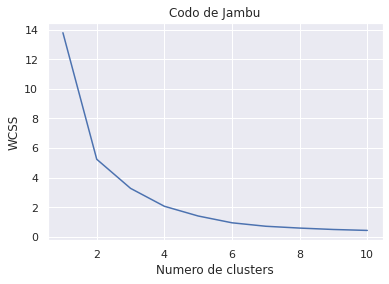

In [146]:
plt.plot(range(1,11),wcss)
plt.title("Codo de Jambu")
plt.xlabel("Numero de clusters")
plt.ylabel("WCSS")
plt.show()

In [147]:
clustering = KMeans(n_clusters =3)
clustering.fit(x_norm)

KMeans(n_clusters=3)

In [148]:
X["Kmeans_clusters"] = clustering.labels_
C = kmeans.cluster_centers_
X.head()

,prior_year_invest_income,curr_year_invest_income,crr_year_other_revenue,prior_year_other_revenue,prior_year_total_revenue,curr_year_total_revenue,curr_year_grants_amount,prior_year_grants_amount,curr_year_members_benef_payment,prior_year_members_benef_payment,...,total_liabi_BOY,net_assets_BOY,net_assets_EOY,num_employees,num_volunteers,curr_year_contrib_grants,prior_year_contrib_grants,curr_year_program_serv_revenue,prior_year_program_serv_revenue,Kmeans_clusters
0,4985,875,46056,2446,10860792,8149792,0,1895000,0,0,...,2958635,7086852,7101715,41,8,6063806,9630722,2039055,1222639,0
1,44884,49828,879096,867183,24058668,27603661,4399851,4046270,0,0,...,1588733,34879994,41980445,223,0,12297805,8879443,14376932,14267158,0
2,150,968,0,904,5321891,5435578,53750,58500,0,0,...,217444,138519,498614,263,10,5406990,5244175,27620,76662,0
3,3694,2779,0,0,120597,120137,0,0,0,0,...,12635,814511,853564,0,0,0,0,117358,116903,0
4,4695186,12813959,199083,264748,73185269,83728369,17832579,16936028,0,0,...,68886096,179666114,175434547,1608,0,8385105,8503360,62330222,59721975,0


In [149]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_x = pca.fit_transform(x_norm)
pca_x_df = pd.DataFrame(data= pca_x, columns = ["Componente_1","Componente_2"])
pca_desc_x = pd.concat([pca_x_df,X["Kmeans_clusters"]],axis = 1)

pca_desc_x

,Componente_1,Componente_2,Kmeans_clusters
0,-0.079065,0.010320,0
1,-0.069740,0.007612,0
2,-0.080019,0.009939,0
3,-0.083907,0.010962,0
4,-0.034587,-0.001925,0
...,...,...,...
1863,-0.083832,0.011005,0
1864,0.095842,0.032619,0
1865,-0.080466,0.010130,0
1866,-0.040858,0.002507,0


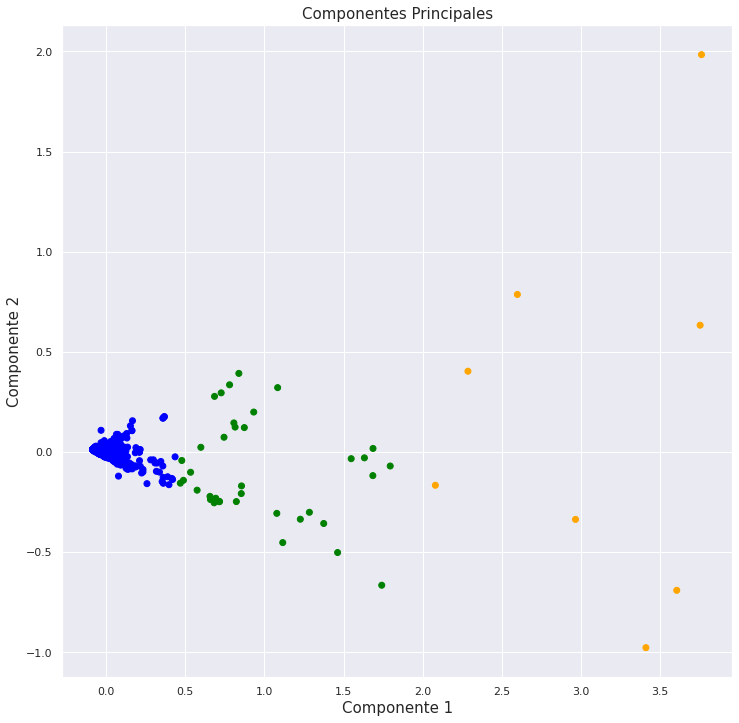

In [150]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Componente 1", fontsize = 15)
ax.set_ylabel("Componente 2", fontsize = 15)
ax.set_title("Componentes Principales", fontsize = 15)

color_theme = np.array(["blue","green","orange","black"])
ax.scatter(x = pca_desc_x.Componente_1, y = pca_desc_x.Componente_2, c = color_theme[pca_desc_x.Kmeans_clusters])
plt.show()

In [151]:
X2 = X.loc[X["Kmeans_clusters"]!= 1]
X2 = X2.drop(columns = ["Kmeans_clusters"])
x2_norm = (X2 - X2.min())/(X2.max()-X2.min())
x2_norm
# X.to_csv("X_KMeans.csv")
# X.columns


,prior_year_invest_income,curr_year_invest_income,crr_year_other_revenue,prior_year_other_revenue,prior_year_total_revenue,curr_year_total_revenue,curr_year_grants_amount,prior_year_grants_amount,curr_year_members_benef_payment,prior_year_members_benef_payment,...,total_liabi_EOY,total_liabi_BOY,net_assets_BOY,net_assets_EOY,num_employees,num_volunteers,curr_year_contrib_grants,prior_year_contrib_grants,curr_year_program_serv_revenue,prior_year_program_serv_revenue
0,1.991632e-06,2.918472e-07,0.000149,0.000007,0.001502,0.000961,0.000000,0.002312,0.0,0.0,...,6.942006e-05,8.447344e-05,0.000188,0.000168,0.000833,0.000348,0.001739,0.004291,0.000374,0.000244
1,1.793228e-05,1.661961e-05,0.002853,0.002647,0.003328,0.003256,0.005400,0.004936,0.0,0.0,...,5.066794e-05,4.536069e-05,0.000924,0.000995,0.004531,0.000000,0.003526,0.003956,0.002634,0.002847
2,5.992875e-08,3.228664e-07,0.000000,0.000003,0.000736,0.000641,0.000066,0.000071,0.0,0.0,...,2.895960e-05,6.208350e-06,0.000004,0.000012,0.005343,0.000435,0.001550,0.002336,0.000005,0.000015
3,1.475845e-06,9.269067e-07,0.000000,0.000000,0.000017,0.000014,0.000000,0.000000,0.0,0.0,...,3.146595e-07,3.607481e-07,0.000022,0.000020,0.000000,0.000000,0.000000,0.000000,0.000022,0.000023
4,1.875844e-03,4.273963e-03,0.000646,0.000808,0.010124,0.009877,0.021887,0.020661,0.0,0.0,...,2.657773e-03,1.966801e-03,0.004761,0.004156,0.032670,0.000000,0.002404,0.003788,0.011419,0.011919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863,1.221308e-05,1.370314e-05,0.000064,0.000062,0.000017,0.000054,0.000074,0.000050,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000025,0.000031,0.000000,0.000000,0.000113,0.000031,0.000000,0.000000
1864,5.409096e-03,5.076010e-03,0.012059,0.010954,0.039630,0.033117,0.060501,0.055075,0.0,0.0,...,1.002600e-02,7.657415e-03,0.013554,0.013210,0.048335,0.136913,0.010774,0.020603,0.041081,0.044526
1865,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000637,0.000739,0.000000,0.000000,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.003779,0.000478,0.000000,0.002052,0.001148,0.000000
1866,8.384943e-04,4.608340e-04,0.000139,0.001069,0.009646,0.006943,0.033362,0.030374,0.0,0.0,...,7.503576e-04,5.462425e-04,0.002624,0.002377,0.010423,0.008696,0.000817,0.007525,0.010000,0.010057


In [152]:
X

,prior_year_invest_income,curr_year_invest_income,crr_year_other_revenue,prior_year_other_revenue,prior_year_total_revenue,curr_year_total_revenue,curr_year_grants_amount,prior_year_grants_amount,curr_year_members_benef_payment,prior_year_members_benef_payment,...,total_liabi_BOY,net_assets_BOY,net_assets_EOY,num_employees,num_volunteers,curr_year_contrib_grants,prior_year_contrib_grants,curr_year_program_serv_revenue,prior_year_program_serv_revenue,Kmeans_clusters
0,4985,875,46056,2446,10860792,8149792,0,1895000,0,0,...,2958635,7086852,7101715,41,8,6063806,9630722,2039055,1222639,0
1,44884,49828,879096,867183,24058668,27603661,4399851,4046270,0,0,...,1588733,34879994,41980445,223,0,12297805,8879443,14376932,14267158,0
2,150,968,0,904,5321891,5435578,53750,58500,0,0,...,217444,138519,498614,263,10,5406990,5244175,27620,76662,0
3,3694,2779,0,0,120597,120137,0,0,0,0,...,12635,814511,853564,0,0,0,0,117358,116903,0
4,4695186,12813959,199083,264748,73185269,83728369,17832579,16936028,0,0,...,68886096,179666114,175434547,1608,0,8385105,8503360,62330222,59721975,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863,30569,41084,19793,20411,121273,455490,59888,41182,0,0,...,0,931995,1301531,0,0,394613,70293,0,0,0
1864,13538818,15218611,3715694,3588698,286482823,280741520,49293154,45146310,0,0,...,268196673,511527113,557624127,2379,3149,37575035,46246422,224232180,223108885,0
1865,0,0,0,0,4606433,6266634,0,0,0,0,...,0,0,0,186,11,0,4606433,6266634,0,0
1866,2098728,1381647,42824,350249,69733113,58854183,27181312,24898597,0,0,...,19131838,99035262,100339317,513,200,2848358,16890026,54581354,50394110,0


In [153]:

from sklearn import model_selection
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression

x = X.drop(columns = ["curr_year_total_revenue"])
x
y = X["curr_year_total_revenue"]
y

0         8149792
1        27603661
2         5435578
3          120137
4        83728369
          ...    
1863       455490
1864    280741520
1865      6266634
1866     58854183
1867    140441734
Name: curr_year_total_revenue, Length: 1868, dtype: int64

In [154]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y, train_size=0.6, random_state=42)

In [155]:
def SSE(residuo):
  return np.sum(residuo**2)

In [156]:
lin_model = linear_model.LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [157]:
residuo_linear = y_train - lin_model.predict(X_train)
sse_train_lin = SSE(residuo_linear)
sse_train_lin

7.502816728140301e-09

In [158]:
residuo_test = y_test - lin_model.predict(X_test)
sse_test_lin = SSE(residuo_test)
sse_test_lin

2.069645072331969e-08

In [169]:
lasso_model = linear_model.Lasso(alpha= 1.5)
lasso_model.fit(X_train, y_train)

Lasso(alpha=1.5)

In [170]:
residuo_train_lasso = y_train - lasso_model.predict(X_train)
sse_train_lasso = SSE(residuo_train_lasso)
sse_train_lasso

3143058737745295.5

In [171]:
residuo_test_lasso = y_test - lasso_model.predict(X_test)
sse_test_lasso = SSE(residuo_test_lasso)
sse_test_lasso

5.2471810252230856e+16

In [172]:
tabla = pd.DataFrame()

In [177]:
Erro_train = [sse_train_lin,sse_train_lasso]
Erro_test = [sse_test_lin, sse_test_lasso]
Model = [lin_model, lasso_model]
tabla["Modelo"] = ["Lineal", "Lasso"]
tabla["Model"] = Model
tabla["Error_train"] = Erro_train
tabla["Error_test"] = Erro_test

tabla

,Modelo,Model,Error_train,Error_test
0,Lineal,LinearRegression(),7.502817e-09,2.069645e-08
1,Lasso,Lasso(alpha=1.5),3.143059e+15,5.247181e+16


In [178]:
lasso_model.predict(X_train)

array([1.92605985e+07, 6.64532163e+07, 2.80355991e+07, ...,
       9.05525659e+07, 7.10352196e+04, 1.81787283e+07])

In [185]:
X["Lasoo_predict"] = lasso_model.predict(x)
X["Lineal_predict"] = lin_model.predict(x)
X

,prior_year_invest_income,curr_year_invest_income,crr_year_other_revenue,prior_year_other_revenue,prior_year_total_revenue,curr_year_total_revenue,curr_year_grants_amount,prior_year_grants_amount,curr_year_members_benef_payment,prior_year_members_benef_payment,...,net_assets_EOY,num_employees,num_volunteers,curr_year_contrib_grants,prior_year_contrib_grants,curr_year_program_serv_revenue,prior_year_program_serv_revenue,Kmeans_clusters,Lasoo_predict,Lineal_predict
0,4985,875,46056,2446,10860792,8149792,0,1895000,0,0,...,7101715,41,8,6063806,9630722,2039055,1222639,0,7.666750e+06,8.149792e+06
1,44884,49828,879096,867183,24058668,27603661,4399851,4046270,0,0,...,41980445,223,0,12297805,8879443,14376932,14267158,0,2.788243e+07,2.760366e+07
2,150,968,0,904,5321891,5435578,53750,58500,0,0,...,498614,263,10,5406990,5244175,27620,76662,0,5.597669e+06,5.435578e+06
3,3694,2779,0,0,120597,120137,0,0,0,0,...,853564,0,0,0,0,117358,116903,0,1.443128e+05,1.201370e+05
4,4695186,12813959,199083,264748,73185269,83728369,17832579,16936028,0,0,...,175434547,1608,0,8385105,8503360,62330222,59721975,0,8.290165e+07,8.372837e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863,30569,41084,19793,20411,121273,455490,59888,41182,0,0,...,1301531,0,0,394613,70293,0,0,0,4.881248e+05,4.554900e+05
1864,13538818,15218611,3715694,3588698,286482823,280741520,49293154,45146310,0,0,...,557624127,2379,3149,37575035,46246422,224232180,223108885,0,2.802705e+08,2.807415e+08
1865,0,0,0,0,4606433,6266634,0,0,0,0,...,0,186,11,0,4606433,6266634,0,0,5.580186e+06,6.266634e+06
1866,2098728,1381647,42824,350249,69733113,58854183,27181312,24898597,0,0,...,100339317,513,200,2848358,16890026,54581354,50394110,0,5.867486e+07,5.885418e+07
